In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Import TensorFlow
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(2)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
1# Upload the data

data = pd.read_csv("D:Car_sales(1).csv")

In [3]:
#Show the data

data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639


In [4]:
#Handle Missing value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Sales_Date           157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(3)
memory usage: 

In [5]:
data.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Sales_Date              0
Power_perf_factor       2
dtype: int64

In [6]:
# Modify Value

data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
data['Year'] = data['Sales_Date'].dt.year
data['Month'] = data['Sales_Date'].dt.month
data['Day'] = data['Sales_Date'].dt.day

In [7]:
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor,Year,Month,Day
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2018-02-02,58.280150,2018,2,2
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2019-06-03,91.370778,2019,6,3
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2018-01-04,NaN,2018,1,4
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2019-03-10,91.389779,2019,3,10
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2019-10-08,62.777639,2019,10,8


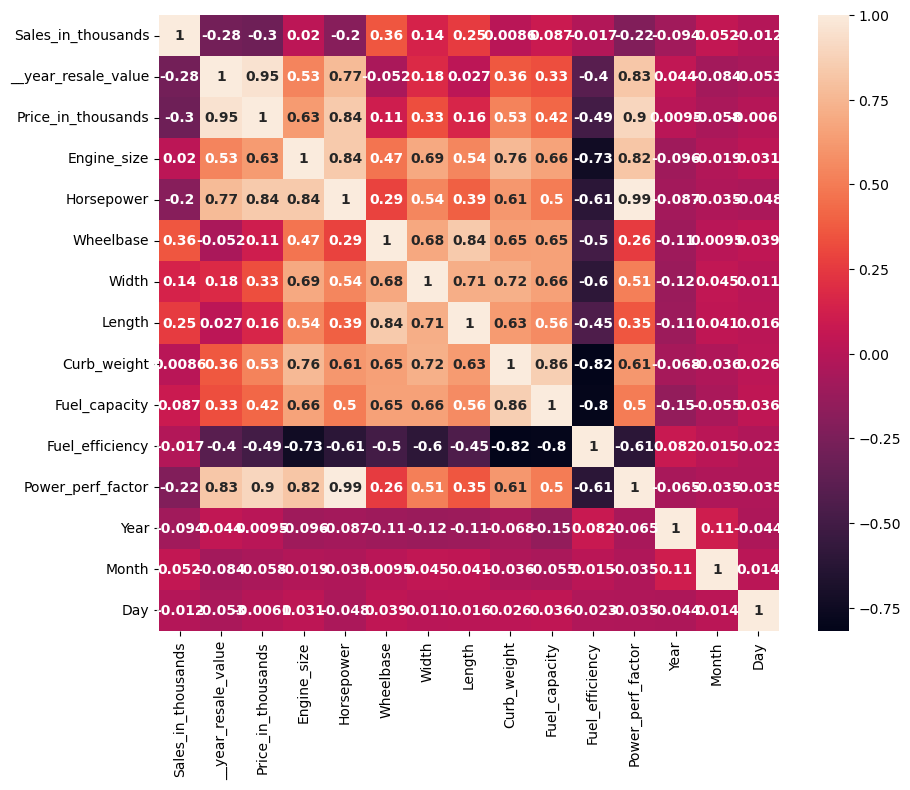

In [10]:
# Perform heatmap of the dataset

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, annot_kws={"weight": "bold"})
plt.show()

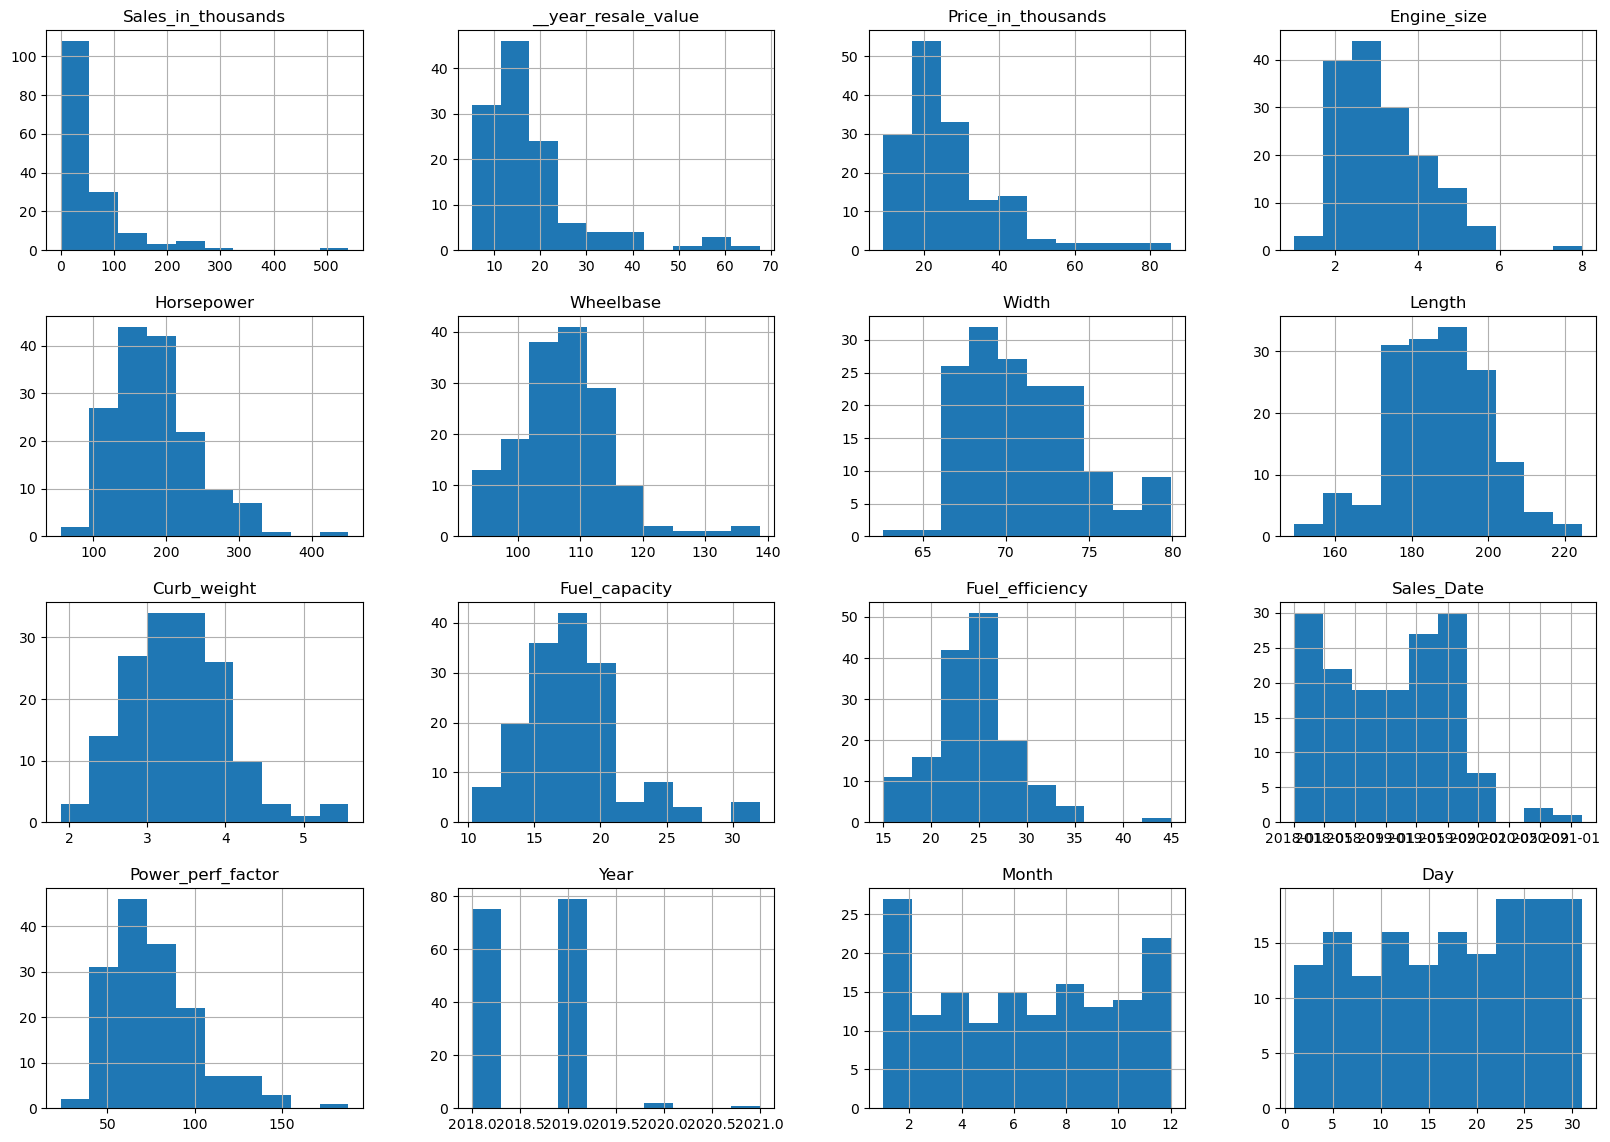

In [11]:
2# Exploring Data Analysis

data.hist(figsize=(20,14))
plt.show()

In [12]:
# Set the Total Sales perform by Price_In_Thousands

data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
weekly_data = data.groupby(['Price_in_thousands', pd.Grouper(key='Sales_Date', freq='W')])['Sales_in_thousands'].sum().reset_index()

In [13]:
mean_total_sales = weekly_data.groupby('Sales_Date')['Sales_in_thousands'].mean().reset_index()
mean_total_sales.rename(columns={'Sales_in_thousands': 'Mean Total Sales'}, inplace=True)

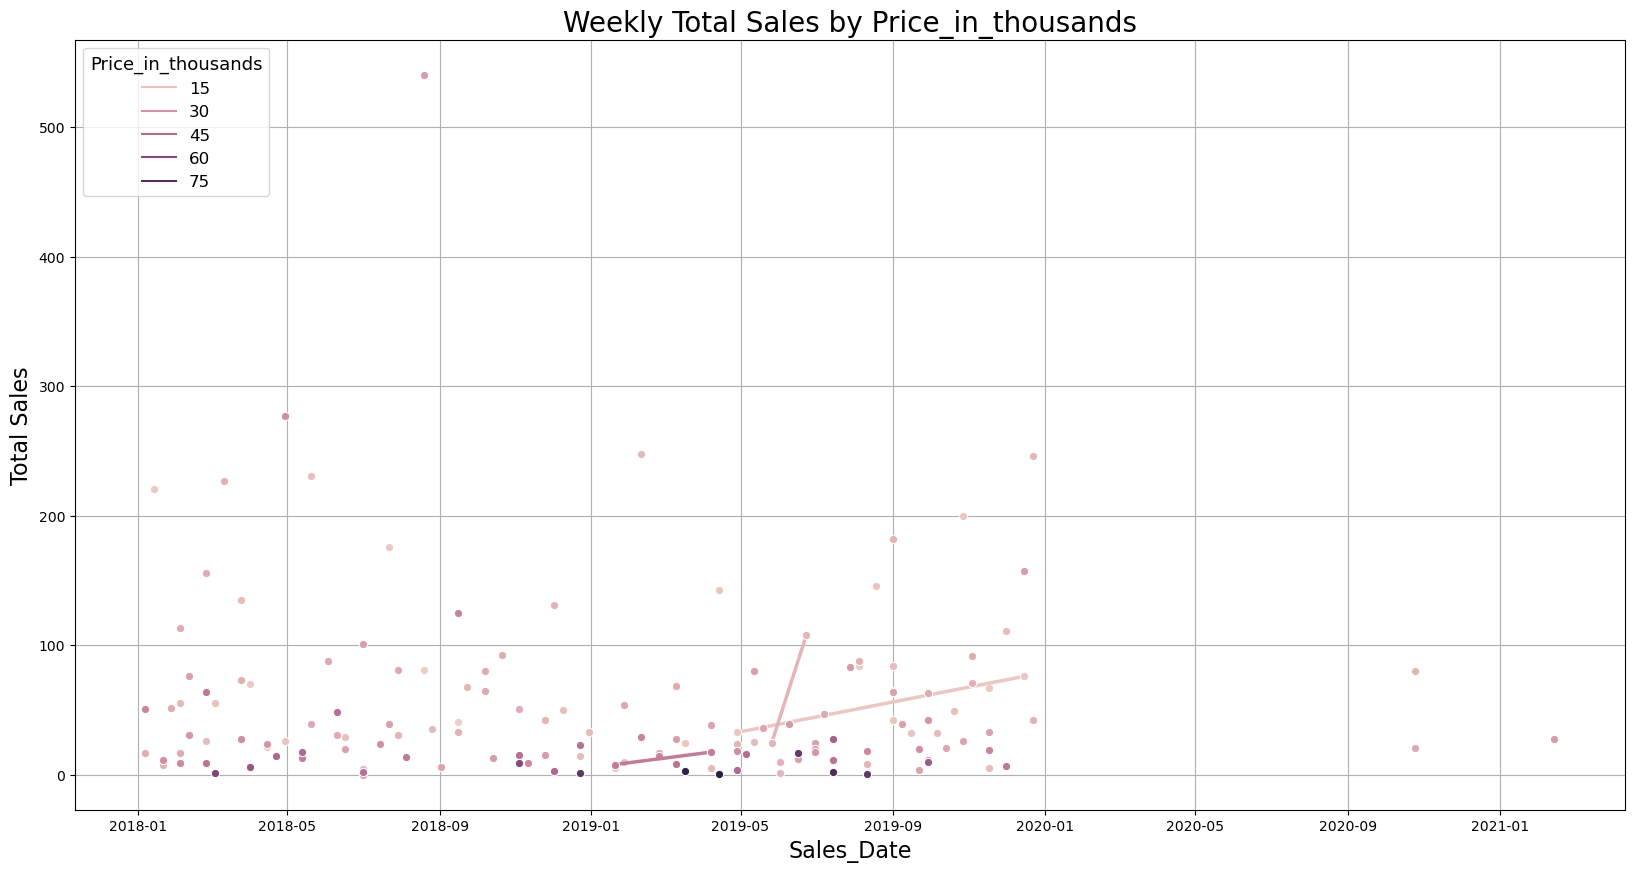

In [14]:
# Plot chart

plt.figure(figsize=(20, 10))
sns.lineplot(x='Sales_Date', y='Sales_in_thousands', hue='Price_in_thousands', data=weekly_data, marker='o', linewidth=2.5)
plt.title('Weekly Total Sales by Price_in_thousands', fontsize=20)
plt.xlabel('Sales_Date', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.legend(title='Price_in_thousands', title_fontsize='13', loc='upper left', fontsize='12')
plt.show()

In [26]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [27]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [35]:
dataset = data.Sales_in_thousands
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

ValueError: Expected 2D array, got 1D array instead:
array=[1.69190e+01 3.93840e+01 1.41140e+01 8.58800e+00 2.03970e+01 1.87800e+01
 1.38000e+00 1.97470e+01 9.23100e+00 1.75270e+01 9.15610e+01 3.93500e+01
 2.78510e+01 8.32570e+01 6.37290e+01 1.59430e+01 6.53600e+00 1.11850e+01
 1.47850e+01 1.45519e+02 1.35126e+02 2.46290e+01 4.25930e+01 2.64020e+01
 1.79470e+01 3.22990e+01 2.18550e+01 1.07995e+02 7.85400e+00 3.27750e+01
 3.11480e+01 3.23060e+01 1.34620e+01 5.34800e+01 3.06960e+01 7.60340e+01
 4.73400e+00 7.11860e+01 8.80280e+01 9.16000e-01 2.27061e+02 1.67670e+01
 3.10380e+01 1.11313e+02 1.01323e+02 1.81749e+02 7.02270e+01 1.13369e+02
 3.50680e+01 2.45815e+02 1.75670e+02 6.34030e+01 2.76747e+02 1.55787e+02
 1.25338e+02 2.20650e+02 5.40561e+02 1.99685e+02 2.30902e+02 7.32030e+01
 1.28550e+01 7.60290e+01 4.11840e+01 6.66920e+01 2.94500e+01 2.37130e+01
 1.54670e+01 5.55570e+01 8.05560e+01 1.57040e+02 2.40720e+01 1.26980e+01
 3.33400e+00 6.37500e+00 9.12600e+00 5.12380e+01 1.37980e+01 4.89110e+01
 2.29250e+01 2.62320e+01 4.25410e+01 5.56160e+01 5.71100e+00 1.10000e-01
 1.13370e+01 3.93480e+01 1.43510e+01 2.65290e+01 6.79560e+01 8.11740e+01
 2.76090e+01 2.03800e+01 1.83920e+01 2.76020e+01 1.67740e+01 3.31100e+00
 7.99800e+00 1.52600e+00 1.15920e+01 9.54000e-01 2.89760e+01 4.26430e+01
 8.80940e+01 7.98530e+01 2.73080e+01 4.25740e+01 5.41580e+01 6.50050e+01
 1.11200e+00 3.85540e+01 8.02550e+01 1.46900e+01 2.00170e+01 2.43610e+01
 3.27340e+01 5.24000e+00 2.41550e+01 1.87200e+00 5.16450e+01 1.31097e+02
 1.99110e+01 9.23640e+01 3.59450e+01 3.95720e+01 8.98200e+00 1.28000e+00
 1.86600e+00 9.19100e+00 1.21150e+01 8.06200e+01 2.45460e+01 5.22300e+00
 8.47200e+00 4.99890e+01 4.71070e+01 3.30280e+01 1.42535e+02 2.47994e+02
 6.38490e+01 3.32690e+01 8.40870e+01 6.51190e+01 2.51060e+01 6.84110e+01
 9.83500e+00 9.76100e+00 8.37210e+01 5.11020e+01 9.56900e+00 5.59600e+00
 4.94630e+01 1.69570e+01 3.54500e+00 1.52450e+01 1.75310e+01 3.49300e+00
 1.89690e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
Sales_thousands = data['Sales_in_thousands']
values = Sales_thousands.values
training_data_len = math.ceil(len(values)* 0.7)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [39]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
50/50 [==============================] - 3s 11ms/step - loss: 0.0042
Epoch 2/3
50/50 [==============================] - 1s 11ms/step - loss: 0.0039
Epoch 3/3
50/50 [==============================] - 1s 10ms/step - loss: 0.0035


In [41]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

2/2 [==============================] - 1s 8ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  60.3698406993408
MAPE:  99.40397612466964


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [45]:
3# Set Data Value to numeric for prediction

data["Sales_in_thousands"]=pd.to_numeric(data.Sales_in_thousands,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         117 non-null    object        
 1   Model                117 non-null    object        
 2   Sales_in_thousands   117 non-null    float64       
 3   __year_resale_value  117 non-null    float64       
 4   Price_in_thousands   117 non-null    float64       
 5   Engine_size          117 non-null    float64       
 6   Horsepower           117 non-null    float64       
 7   Wheelbase            117 non-null    float64       
 8   Width                117 non-null    float64       
 9   Length               117 non-null    float64       
 10  Curb_weight          117 non-null    float64       
 11  Fuel_capacity        117 non-null    float64       
 12  Fuel_efficiency      117 non-null    float64       
 13  Sales_Date           117 non-null  

In [47]:
# Using MinMaxScaler for scaling the data

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(117, 1)

In [48]:
# Trainning and Testing

X_train = []
y_train = []

for i in range (60,117): #60 : timestep // 1149 : Length of the data
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [49]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(57, 60, 1)

In [50]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [51]:
hist = model.fit(X_train, y_train, epochs = 25, batch_size = 32, verbose=2)

Epoch 1/25
2/2 - 5s - loss: 0.0938 - 5s/epoch - 2s/step
Epoch 2/25
2/2 - 0s - loss: 0.0608 - 147ms/epoch - 73ms/step
Epoch 3/25
2/2 - 0s - loss: 0.0515 - 144ms/epoch - 72ms/step
Epoch 4/25
2/2 - 0s - loss: 0.0560 - 143ms/epoch - 72ms/step
Epoch 5/25
2/2 - 0s - loss: 0.0549 - 144ms/epoch - 72ms/step
Epoch 6/25
2/2 - 0s - loss: 0.0521 - 142ms/epoch - 71ms/step
Epoch 7/25
2/2 - 0s - loss: 0.0529 - 143ms/epoch - 71ms/step
Epoch 8/25
2/2 - 0s - loss: 0.0550 - 141ms/epoch - 70ms/step
Epoch 9/25
2/2 - 0s - loss: 0.0516 - 137ms/epoch - 69ms/step
Epoch 10/25
2/2 - 0s - loss: 0.0515 - 142ms/epoch - 71ms/step
Epoch 11/25
2/2 - 0s - loss: 0.0509 - 140ms/epoch - 70ms/step
Epoch 12/25
2/2 - 0s - loss: 0.0519 - 144ms/epoch - 72ms/step
Epoch 13/25
2/2 - 0s - loss: 0.0509 - 144ms/epoch - 72ms/step
Epoch 14/25
2/2 - 0s - loss: 0.0496 - 142ms/epoch - 71ms/step
Epoch 15/25
2/2 - 0s - loss: 0.0514 - 143ms/epoch - 71ms/step
Epoch 16/25
2/2 - 0s - loss: 0.0523 - 145ms/epoch - 72ms/step
Epoch 17/25
2/2 - 0s -

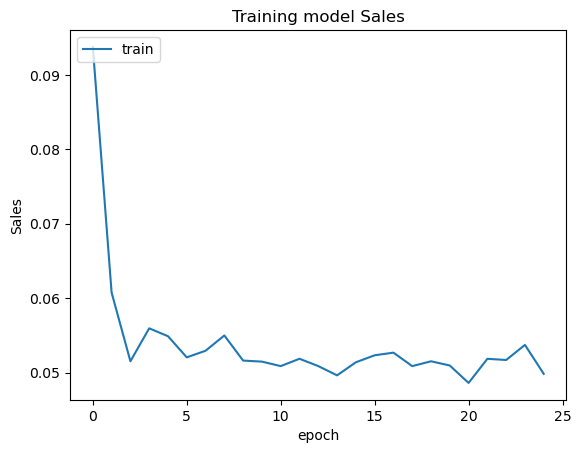

In [52]:
#Plot the Train and Test model

plt.plot(hist.history['loss'])
plt.title('Training model Sales')
plt.ylabel('Sales')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [53]:
# Prepare model for each Sales_In_Thousands

testData = pd.read_csv("D:Car_sales(2).csv")
testData["Sales_in_thousands"]=pd.to_numeric(testData.Sales_in_thousands,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputSaling = testData.iloc[:,0:].values
inputSaling_scaled = sc.transform(inputSaling)
inputSaling_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length) :
  X_test.append(inputSaling_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(57, 60, 1)

In [54]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 1s 19ms/step


array([[0.21713072],
       [0.21645191],
       [0.21528877],
       [0.21369603],
       [0.2117975 ],
       [0.20999596],
       [0.20863879],
       [0.20794988],
       [0.20796594],
       [0.20859593],
       [0.20964707],
       [0.2109856 ],
       [0.21255162],
       [0.2142942 ],
       [0.21612386],
       [0.21791118],
       [0.21949494],
       [0.22079164],
       [0.221694  ],
       [0.22199854],
       [0.22142844],
       [0.21975401],
       [0.21747112],
       [0.21518835],
       [0.213355  ],
       [0.21223193],
       [0.21188939],
       [0.2123583 ],
       [0.21344608],
       [0.21492717],
       [0.2166476 ],
       [0.2185812 ],
       [0.22068927],
       [0.22285967],
       [0.22495708],
       [0.22685653],
       [0.22841674],
       [0.2295624 ],
       [0.2302506 ],
       [0.2303436 ],
       [0.22952253],
       [0.22756578],
       [0.22496118],
       [0.22233202],
       [0.2201754 ],
       [0.21880628],
       [0.21829921],
       [0.218

In [55]:
predicted_price = sc.inverse_transform(y_pred)

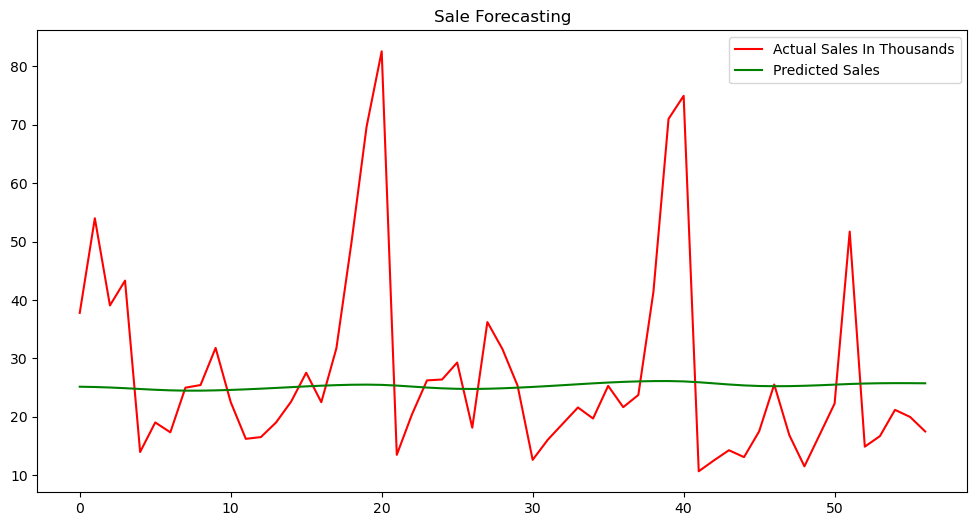

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color = 'red', label = 'Actual Sales In Thousands')
plt.plot(predicted_price, color = 'green', label = 'Predicted Sales')
plt.title('Sale Forecasting')
plt.xlabel
plt.ylabel
plt.legend()
plt.show()

In [57]:
data = pd.read_csv("D:Car_sales(1).csv")

In [58]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2019,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2018,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2019,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2019,101.623357


In [59]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

Text(0.5, 1.0, 'Sales_in_thousands')

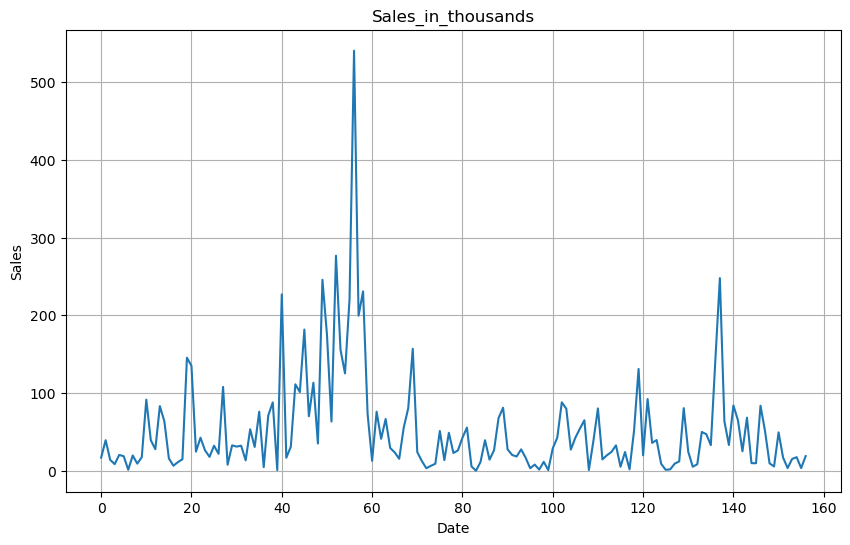

In [60]:
data_Sales = data['Sales_in_thousands']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(data_Sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales_in_thousands')

In [61]:
def test_stationarity(timeseries):
    '''
    Input: timeseries (dataframe): timeseries for which we want to study the stationarity
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',\
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

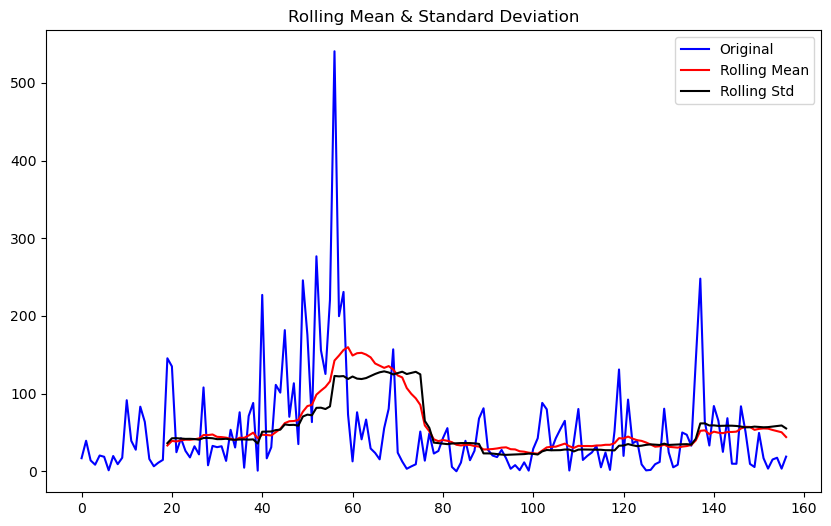

Results of Dickey-Fuller Test:


NameError: name 'adfuller' is not defined

In [62]:
plt.figure(figsize = (10,6))
test_stationarity(data_Sales.head(2000))

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

<Figure size 640x480 with 0 Axes>

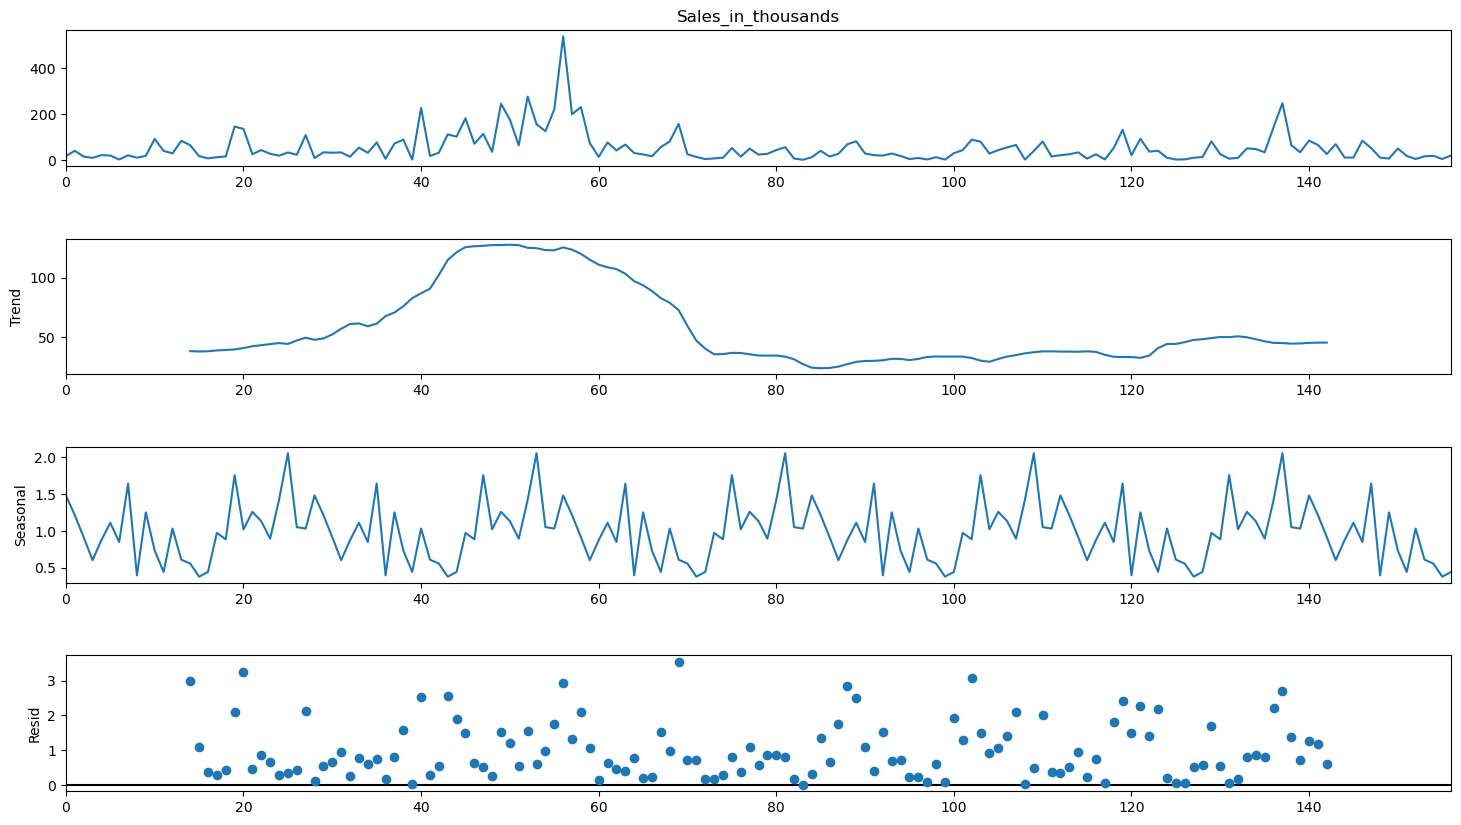

In [64]:
result = seasonal_decompose(data_Sales, model='multiplicative',period=28)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Text(0.5, 1.0, 'Transformed data')

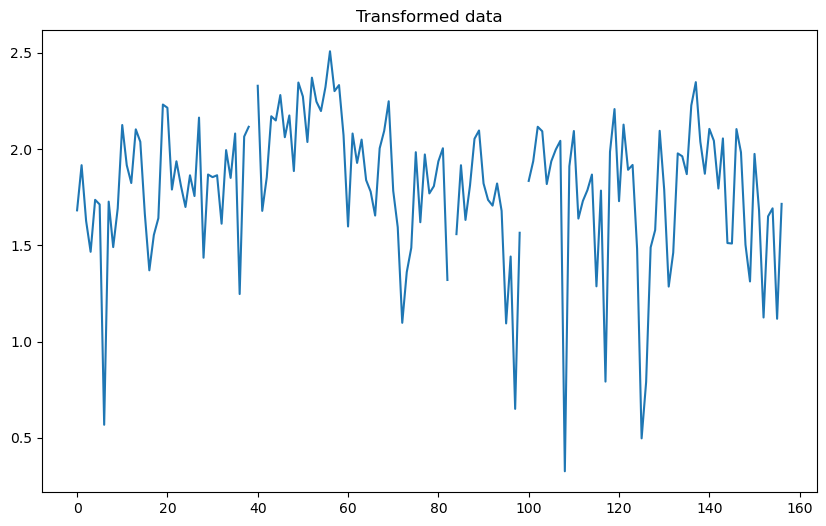

In [65]:
data_Sales_log = data_Sales.apply(np.log)
data_Sales_tf = data_Sales_log.apply(np.sqrt)

plt.figure(figsize = (10,6))
plt.plot(data_Sales_tf)
plt.title('Transformed data')

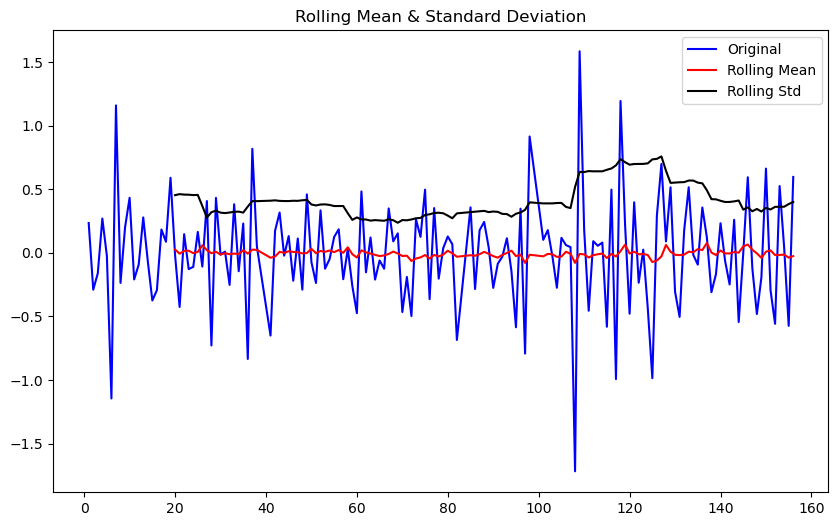

Results of Dickey-Fuller Test:
Test Statistic                -7.831874e+00
p-value                        6.261614e-12
#Lags Used                     7.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


In [66]:
data_Sales_shift = data_Sales_tf - data_Sales_tf.shift()

data_Sales_shift.dropna(inplace=True)
plt.figure(figsize = (10,6))
test_stationarity(data_Sales_shift)

In [67]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [68]:
nb_days = 30

n_features = 1

X, y = preprocess_lstm(data_Sales_shift.to_numpy(), nb_days, n_features)

In [69]:
test_days = 60

X_train, y_train = X[:-test_days], y[:-test_days]
X_test, y_test = X[-test_days:], y[-test_days:]

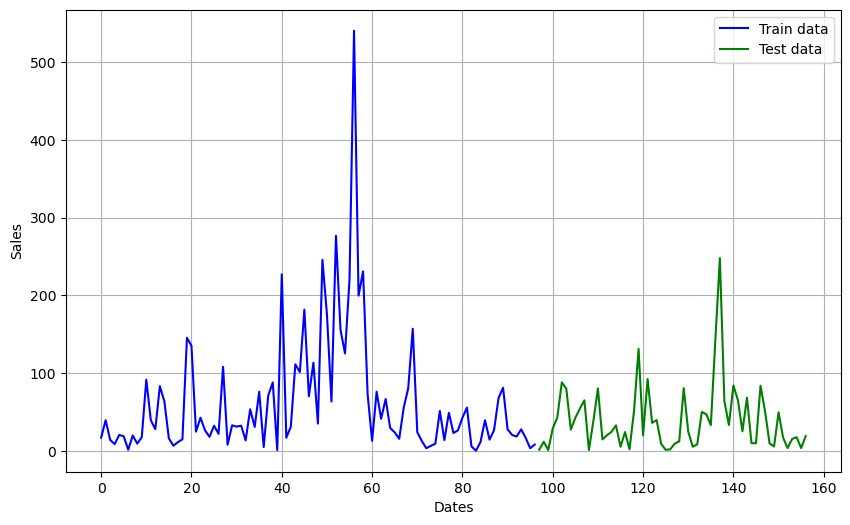

In [70]:
train_original = data_Sales.iloc[:-test_days]
test_original = data_Sales.iloc[-test_days:]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.legend()

In [71]:
def vanilla_LSTM():
    model = Sequential()    
    model.add(LSTM(units=50, input_shape=(nb_days, n_features)))
    model.add(Dense(1))
    return model

In [72]:
model = vanilla_LSTM()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test MSE:", results[0])
print("Test MAE:", results[1])

Evaluate on test data
2/2 [==============================] - 0s 5ms/step - loss: 0.2877 - mean_absolute_error: 0.3990
Test MSE: 0.2876800000667572
Test MAE: 0.3990333378314972


In [74]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


In [75]:
pred_data = pd.DataFrame(y_pred[0,0], test_original.index,columns=['Sales_in_thousands'])

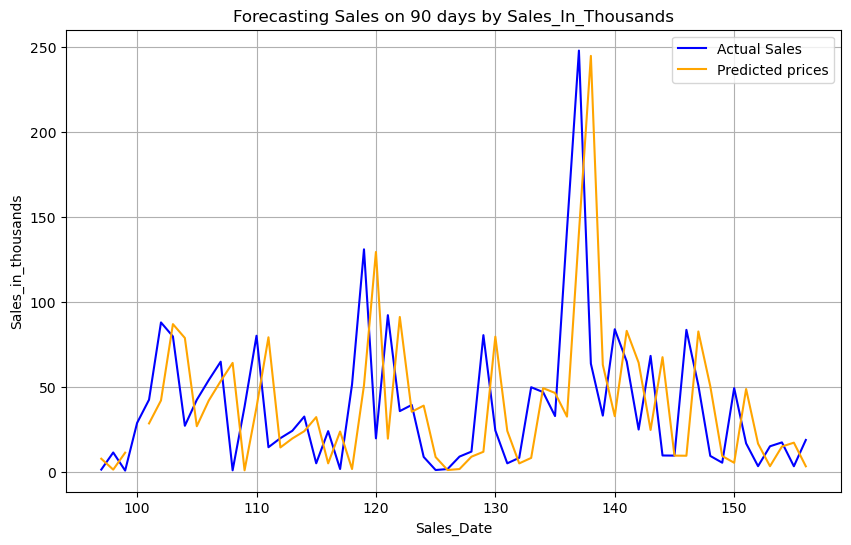

In [76]:
pred_data['Sales_in_thousands'] = pred_data['Sales_in_thousands'] + data_Sales_tf.shift().values[-test_days:] 

pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Sales_Date')
plt.ylabel('Sales_in_thousands')
plt.plot(test_original,'b',label='Actual Sales')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title('Forecasting Sales on 90 days by Sales_In_Thousands')

plt.legend()

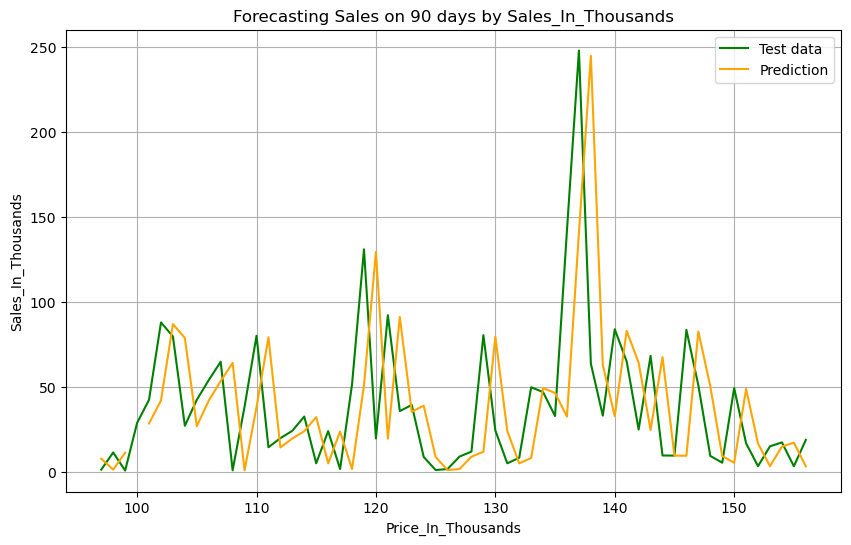

In [77]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Price_In_Thousands')
plt.ylabel('Sales_In_Thousands')
plt.plot(test_original, 'g', label='Test data')
plt.plot(pred_data, 'orange', label='Prediction')
plt.title('Forecasting Sales on 90 days by Sales_In_Thousands')
plt.legend()